### Proyek_Dataset_TaylorSwift-BM11 VS BM25

In [1]:
import pandas as pd
import re
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("TaylorSwift.csv")

# melihat dataset
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...


In [3]:
print('Row count is:', len(df))

Row count is: 479


In [4]:
new_df = df['Lyric']

In [5]:
new_df.isnull().sum()

2

In [6]:
new_df_without_null=new_df.dropna()

In [7]:
new_df_without_null.isnull().sum()

0

In [8]:
new_df_without_null.head()

0    vintage tee brand new phone high heels on cobb...
1    justin vernon i can see you standing honey wit...
2    we could leave the christmas lights up 'til ja...
3    i'm doing good i'm on some new shit been sayin...
4    i don't like your little games don't like your...
Name: Lyric, dtype: object

In [9]:
def remove_number(text):
    return  re.sub(r"\[0-9]+", "", str(text))
 
new_df_without_null = new_df_without_null.apply(remove_number)

In [10]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()


new_df_without_null = new_df_without_null.apply(remove_whitespace_LT)

In [11]:
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)


new_df_without_null = new_df_without_null.apply(remove_whitespace_multiple)

In [12]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

new_df_without_null = new_df_without_null.apply(remove_singl_char)

In [13]:
# Tokenisasi for Document
doc_tokens_trec = [word_tokenize(kalimat) for kalimat in new_df_without_null]
print(*doc_tokens_trec[0:1], sep = "\n")

['vintage', 'tee', 'brand', 'new', 'phone', 'high', 'heels', 'on', 'cobblestones', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'sequin', 'smile', 'black', 'lipstick', 'sensual', 'politics', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'knew', 'you', 'dancin', "'", 'in', 'your', 'levi', "'", 'drunk', 'under', 'streetlight', 'knew', 'you', 'hand', 'under', 'my', 'sweatshirt', 'baby', 'kiss', 'it', 'better', 'refrain', 'and', 'when', 'felt', 'like', 'was', 'an', 'old', 'cardigan', 'under', 'someone', "'", 'bed', 'you', 'put', 'me', 'on', 'and', 'said', 'was', 'your', 'favorite', 'friend', 'to', 'all', 'is', 'friend', 'to', 'none', 'chase', 'two', 'girls', 'lose', 'the', 'one', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'knew', 'you', 'playing', 'hideandseek', 'and', 'giving', 'me', 'your', 'weekends', 'knew', 'you', 'your', 'heartbeat', 'on', 'the', 'high', 'line', 'once', 'in', 'twe

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Stopword for Document
doc_stopwords_trec = [[token for token in kalimat if token not in stopwords.words('english')]
                                  for kalimat in doc_tokens_trec]

In [16]:
def punctuation(txt):
  result = re.sub(r'[^\w\s]','',txt)
  return result
new_df_without_null = new_df_without_null.apply(punctuation)


In [17]:
new_df_without_null[0]

'vintage tee brand new phone high heels on cobblestones when you are young they assume you know nothing sequin smile black lipstick sensual politics when you are young they assume you know nothing but  knew you dancin in your levi drunk under  streetlight   knew you hand under my sweatshirt baby kiss it better  refrain and when  felt like  was an old cardigan under someone bed you put me on and said  was your favorite  friend to all is  friend to none chase two girls lose the one when you are young they assume you know nothing but  knew you playing hideandseek and giving me your weekends   knew you your heartbeat on the high line once in twenty lifetimes  refrain and when  felt like  was an old cardigan under someone bed you put me on and said  was your favorite to kiss in cars and downtown bars was all we needed you drew stars around my scars but now  bleedin cause  knew you steppin on the last train marked me like  bloodstain   knew you tried to change the ending peter losing wendy  

##### BM25

In [18]:
class BM25:
    def __init__(self, k1=1.2, b=0.75):
        self.b = b
        self.k1 = k1

    def fit(self, corpus):
        """
        Fit the various statistics that are required to calculate BM25 ranking
        score using the corpus given.

        Parameters
        ----------
        corpus : list[list[str]]
            Each element in the list represents a document, and each document
            is a list of the terms.

        Returns
        -------
        self
        """
        tf = []
        df = {}
        idf = {}
        doc_len = []
        corpus_size = 0
        for document in corpus:
            corpus_size += 1
            doc_len.append(len(document))

            # compute tf (term frequency) per document
            frequencies = {}
            for term in document:
                term_count = frequencies.get(term, 0) + 1
                frequencies[term] = term_count

            tf.append(frequencies)

            # compute df (document frequency) per term
            for term, _ in frequencies.items():
                df_count = df.get(term, 0) + 1
                df[term] = df_count

        for term, freq in df.items():
            idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

        self.tf_ = tf
        self.df_ = df
        self.idf_ = idf
        self.doc_len_ = doc_len
        self.corpus_ = corpus
        self.corpus_size_ = corpus_size
        self.avg_doc_len_ = sum(doc_len) / corpus_size
        return self

    def search(self, query):
        scores = [self._score(query, index) for index in range(self.corpus_size_)]
        return scores

    def _score(self, query, index):
        score = 0.0

        doc_len = self.doc_len_[index]
        frequencies = self.tf_[index]
        for term in query:
            if term not in frequencies:
                continue

            freq = frequencies[term]
            numerator = self.idf_[term] * freq * (self.k1 + 1)
            denominator = freq + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_len_)
            score += (numerator / denominator)

        return score

In [19]:
import math
import json
import requests

In [20]:
# query = "i think i remember you from yesterday"
# stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
# query = [word for word in query.lower().split() if word not in stopwords]

# bm25 = BM25()
# bm25.fit(doc_stopwords_trec)
# scores = bm25.search(query)

# for score, doc in zip(scores, df['Dialogue']):
#     score = round(score, 3)
#     print(str(score) + '\t' + doc)

In [21]:
query = "we come back every time"
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
query = [word for word in query.lower().split() if word not in stopwords]

bm25 = BM25()
bm25.fit(doc_stopwords_trec)
scores = bm25.search(query)
data1 = []
data2 =[]
for score, doc in zip(scores, new_df_without_null):
    score = round(score, 3)
    data1.append(str(score))
    data2.append(doc)

In [22]:
print(data1)

['4.365', '1.332', '2.179', '1.298', '2.408', '1.355', '0.797', '0.0', '0.0', '2.771', '2.7', '2.655', '0.0', '4.869', '0.0', '1.53', '1.567', '2.887', '2.529', '2.703', '1.463', '7.807', '2.519', '0.901', '1.946', '2.584', '0.0', '2.239', '6.117', '1.411', '2.13', '4.152', '1.3', '2.005', '2.478', '1.236', '1.392', '1.376', '1.74', '0.0', '1.359', '0.0', '0.867', '1.304', '2.339', '1.932', '2.077', '1.831', '0.0', '2.215', '0.0', '1.827', '2.446', '1.05', '0.0', '1.489', '0.821', '0.659', '3.405', '0.825', '0.0', '1.262', '1.521', '1.34', '0.779', '3.084', '1.737', '0.0', '2.187', '2.743', '0.781', '0.886', '1.033', '2.502', '2.752', '0.918', '0.916', '1.555', '4.045', '2.077', '5.689', '3.505', '1.21', '2.041', '1.562', '0.675', '3.586', '2.998', '1.112', '2.328', '2.181', '1.142', '1.549', '1.67', '0.0', '1.033', '2.37', '3.017', '3.778', '1.113', '3.643', '0.784', '1.228', '4.472', '3.835', '0.0', '3.24', '2.133', '0.0', '1.703', '0.0', '2.515', '3.533', '4.623', '0.872', '2.259', 

In [23]:
print(data2)

['vintage tee brand new phone high heels on cobblestones when you are young they assume you know nothing sequin smile black lipstick sensual politics when you are young they assume you know nothing but  knew you dancin in your levi drunk under  streetlight   knew you hand under my sweatshirt baby kiss it better  refrain and when  felt like  was an old cardigan under someone bed you put me on and said  was your favorite  friend to all is  friend to none chase two girls lose the one when you are young they assume you know nothing but  knew you playing hideandseek and giving me your weekends   knew you your heartbeat on the high line once in twenty lifetimes  refrain and when  felt like  was an old cardigan under someone bed you put me on and said  was your favorite to kiss in cars and downtown bars was all we needed you drew stars around my scars but now  bleedin cause  knew you steppin on the last train marked me like  bloodstain   knew you tried to change the ending peter losing wendy 

In [24]:
data4 = pd.DataFrame({'Score':data1,'Doc':data2})

In [25]:
data4.head(10)

,Score,Doc
0,4.365,vintage tee brand new phone high heels on cobb...
1,1.332,justin vernon can see you standing honey with...
2,2.179,we could leave the christmas lights up til jan...
3,1.298,doing good on some new shit been saying yes ...
4,2.408,don like your little games don like your tilt...
5,1.355,betty won make assumptions about why you swit...
6,0.797,taylor swift future wanna be your end game w...
7,0.0,taylor swift promise that youll never find an...
8,0.0,you are somebody that don know but youre taki...
9,2.771,salt air and the rust on your door never need...


In [26]:
data4.to_csv('data4.csv',index = False)

In [27]:
TaylorSwift = pd.read_csv('data4.csv')
TaylorSwift.head(10).sort_values('Score', ascending=False)

,Score,Doc
0,4.365,vintage tee brand new phone high heels on cobb...
9,2.771,salt air and the rust on your door never need...
4,2.408,don like your little games don like your tilt...
2,2.179,we could leave the christmas lights up til jan...
5,1.355,betty won make assumptions about why you swit...
1,1.332,justin vernon can see you standing honey with...
3,1.298,doing good on some new shit been saying yes ...
6,0.797,taylor swift future wanna be your end game w...
7,0.000,taylor swift promise that youll never find an...
8,0.000,you are somebody that don know but youre taki...


##### BM11

In [28]:
class BM11:
    def __init__(self, k1=1.5, b=1):
        self.b = b
        self.k1 = k1

    def fit(self, corpus):
        """
        Fit the various statistics that are required to calculate BM11 ranking
        score using the corpus given.

        Parameters
        ----------
        corpus : list[list[str]]
            Each element in the list represents a document, and each document
            is a list of the terms.

        Returns
        -------
        self
        """
        tf = []
        df = {}
        idf = {}
        doc_len = []
        corpus_size = 0
        for document in corpus:
            corpus_size += 1
            doc_len.append(len(document))

            # compute tf (term frequency) per document
            frequencies = {}
            for term in document:
                term_count = frequencies.get(term, 0) + 1
                frequencies[term] = term_count

            tf.append(frequencies)

            # compute df (document frequency) per term
            for term, _ in frequencies.items():
                df_count = df.get(term, 0) + 1
                df[term] = df_count

        for term, freq in df.items():
            idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

        self.tf_ = tf
        self.df_ = df
        self.idf_ = idf
        self.doc_len_ = doc_len
        self.corpus_ = corpus
        self.corpus_size_ = corpus_size
        self.avg_doc_len_ = sum(doc_len) / corpus_size
        return self

    def search(self, query):
        scores = [self._score(query, index) for index in range(self.corpus_size_)]
        return scores

    def _score(self, query, index):
        score = 0.0

        doc_len = self.doc_len_[index]
        frequencies = self.tf_[index]
        for term in query:
            if term not in frequencies:
                continue

            freq = frequencies[term]
            numerator = self.idf_[term] * freq * (self.k1 + 1)
            denominator = freq + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_len_)
            score += (numerator / denominator)

        return score

In [29]:
import math
import json
import requests

In [30]:
query = "we come back every time"
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
query = [word for word in query.lower().split() if word not in stopwords]

bm11 = BM11()
bm11.fit(doc_stopwords_trec)
scores = bm11.search(query)
data1 = []
data2 =[]
for score, doc in zip(scores, new_df_without_null):
    score = round(score, 3)
    data1.append(str(score))
    data2.append(doc)

In [31]:
data5 = pd.DataFrame({'Score':data1,'Doc':data2})

In [32]:
data5.head(10)

,Score,Doc
0,4.59,vintage tee brand new phone high heels on cobb...
1,1.375,justin vernon can see you standing honey with...
2,2.374,we could leave the christmas lights up til jan...
3,1.382,doing good on some new shit been saying yes ...
4,2.384,don like your little games don like your tilt...
5,1.436,betty won make assumptions about why you swit...
6,0.675,taylor swift future wanna be your end game w...
7,0.0,taylor swift promise that youll never find an...
8,0.0,you are somebody that don know but youre taki...
9,2.951,salt air and the rust on your door never need...


In [33]:
data5.head(10).sort_values('Score', ascending=False)

,Score,Doc
0,4.59,vintage tee brand new phone high heels on cobb...
9,2.951,salt air and the rust on your door never need...
4,2.384,don like your little games don like your tilt...
2,2.374,we could leave the christmas lights up til jan...
5,1.436,betty won make assumptions about why you swit...
3,1.382,doing good on some new shit been saying yes ...
1,1.375,justin vernon can see you standing honey with...
6,0.675,taylor swift future wanna be your end game w...
7,0.0,taylor swift promise that youll never find an...
8,0.0,you are somebody that don know but youre taki...


##### BM11 VS BM25 Q1

In [34]:
df = pd.DataFrame(data4,columns=['Score','Doc'])

In [35]:
data5['score2'] = data4['Score']

In [36]:
new_df = data5.head(20)

In [37]:
listbaru = []
j = 1
for i in new_df['Doc']:
    listbaru.append(j)
    j+=1

new_df['doc_no'] = listbaru

<ipython-input-37-0cc27fc5d3c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['doc_no'] = listbaru


In [38]:
new_df['Score'] = new_df['Score'].astype(float)
new_df['score2'] = new_df['score2'].astype(float)

<ipython-input-38-2b6b1e9ad63a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Score'] = new_df['Score'].astype(float)
<ipython-input-38-2b6b1e9ad63a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['score2'] = new_df['score2'].astype(float)


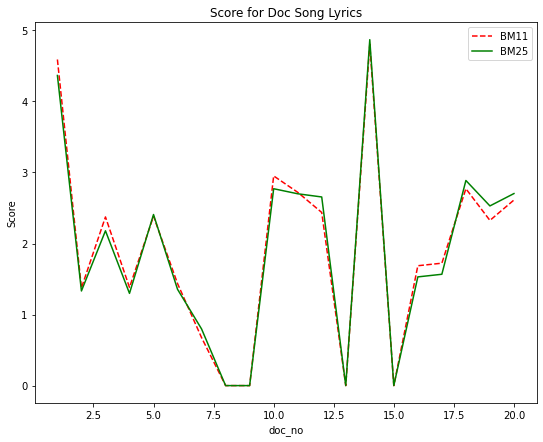

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[9, 7])
plt.plot(new_df['doc_no'], new_df['Score'], color='r', label='BM11', linestyle = 'dashed')
plt.plot(new_df['doc_no'], new_df['score2'], color='g', label='BM25')
plt.xlabel("doc_no")
plt.ylabel("Score")
plt.title("Score for Doc Song Lyrics")
plt.legend()
plt.show()